In [41]:
import numpy as np
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler

In [8]:
dataset = pd.read_csv('bill_authentication.csv')
print(dataset.shape)
dataset.head()

(1372, 5)


,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


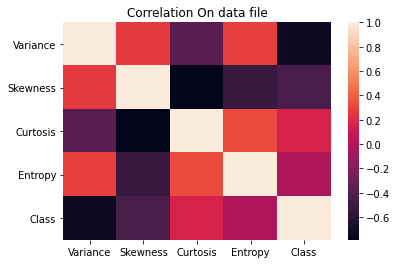

In [3]:
plt.figure(1)
sns.heatmap(dataset.corr())
plt.title('Correlation On data file')
plt.show()

In [6]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X.shape, y.shape)

(1372, 4) (1372,)


In [47]:
def predict(kernel, X_train,y_train,X_test,y_test):
    # Linear Kernel
    classifier = svm.SVC(kernel = kernel, random_state = 0)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
    disp.plot()
    plt.title(kernel + " kernel")
    plt.show()
    print(classification_report(y_test, y_pred))



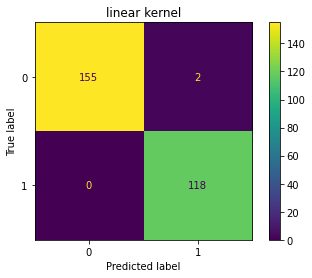

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       157
           1       0.98      1.00      0.99       118

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



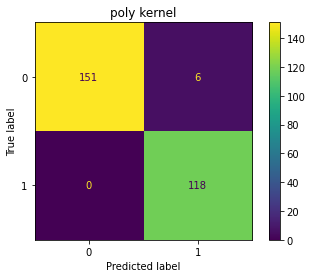

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       157
           1       0.95      1.00      0.98       118

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275



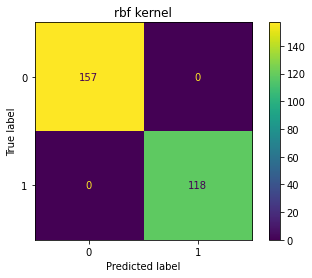

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00       118

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



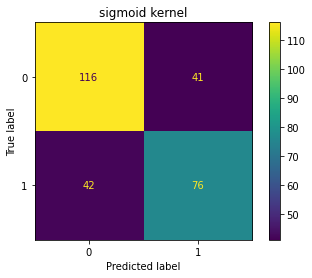

              precision    recall  f1-score   support

           0       0.73      0.74      0.74       157
           1       0.65      0.64      0.65       118

    accuracy                           0.70       275
   macro avg       0.69      0.69      0.69       275
weighted avg       0.70      0.70      0.70       275



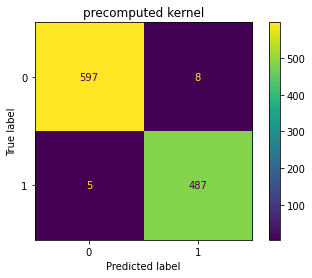

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       605
           1       0.98      0.99      0.99       492

    accuracy                           0.99      1097
   macro avg       0.99      0.99      0.99      1097
weighted avg       0.99      0.99      0.99      1097



In [48]:
predict('linear', X_train,y_train,X_test,y_test)
predict('poly', X_train,y_train,X_test,y_test)
predict('rbf', X_train,y_train,X_test,y_test)
predict('sigmoid', X_train,y_train,X_test,y_test)

new_X_train = np.dot(X_train,X_train.T)
predict('precomputed', new_X_train,y_train,new_X_train,y_train)


In [49]:
# Normalize the data now and perrform above functions
min_max_scaler = MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_test_minmax = min_max_scaler.fit_transform(X_test)

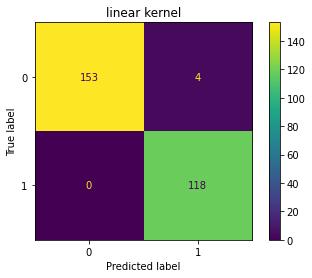

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       157
           1       0.97      1.00      0.98       118

    accuracy                           0.99       275
   macro avg       0.98      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



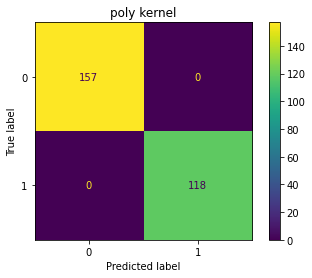

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00       118

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



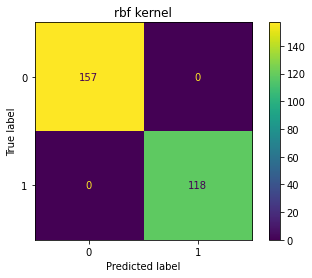

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00       118

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



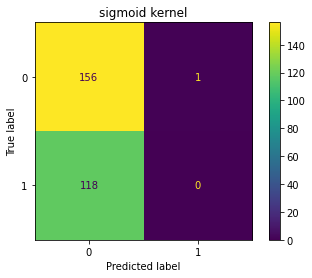

              precision    recall  f1-score   support

           0       0.57      0.99      0.72       157
           1       0.00      0.00      0.00       118

    accuracy                           0.57       275
   macro avg       0.28      0.50      0.36       275
weighted avg       0.33      0.57      0.41       275



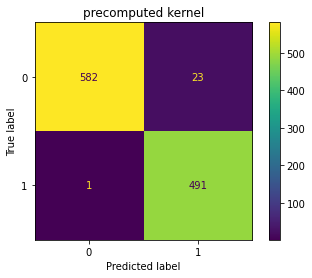

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       605
           1       0.96      1.00      0.98       492

    accuracy                           0.98      1097
   macro avg       0.98      0.98      0.98      1097
weighted avg       0.98      0.98      0.98      1097



In [50]:
predict('linear', X_train_minmax,y_train,X_test_minmax,y_test)
predict('poly', X_train_minmax,y_train,X_test_minmax,y_test)
predict('rbf', X_train_minmax,y_train,X_test_minmax,y_test)
predict('sigmoid', X_train_minmax,y_train,X_test_minmax,y_test)

new_X_train = np.dot(X_train_minmax,X_train_minmax.T)
predict('precomputed', new_X_train,y_train,new_X_train,y_train)
